#                                  Bank Customer Churn Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('bank eda project.csv')

### Displaying first 5 rows of dataset

In [3]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Displaying last 5 rows of dataset

In [4]:
df.tail()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,15628319,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [5]:
df.shape

(10000, 12)

In [6]:
# Information about my DataFrame 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [7]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
# To check columns names 
df.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

### DATA CLEANING

In [9]:
# To check null values
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [10]:
df.isnull().sum()/df.shape[0]*100

customer_id         0.0
credit_score        0.0
country             0.0
gender              0.0
age                 0.0
tenure              0.0
balance             0.0
products_number     0.0
credit_card         0.0
active_member       0.0
estimated_salary    0.0
churn               0.0
dtype: float64

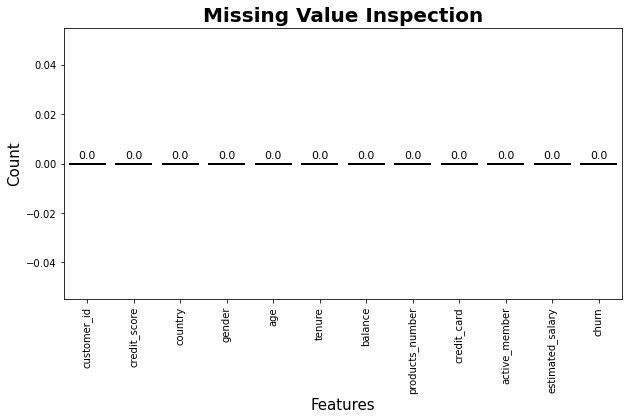

In [11]:
Value_Missing = df.isnull().sum().sort_values(ascending = False)
percent_missing = (df.isnull().sum() * 100 / len(df)).round(2).sort_values(ascending = False)
missing_data = pd.concat([Value_Missing, percent_missing], axis = 1, keys = ['Total', 'Percent'])
f, ax = plt.subplots(figsize = (10, 5))
plt.xticks(rotation = '90')
cplot = sns.barplot(x = missing_data.index, y = missing_data['Percent'], palette = 'bone_r', lw = 2, ec = 'black')
for count in cplot.patches:
    height = count.get_height()
    ax.annotate('{}'.format(height),xy = (count.get_x() + count.get_width()/2, height),
                    ha = 'center', va = 'bottom', size = 11, xytext = (0, 3), textcoords = 'offset points')
cplot.set_title('Missing Value Inspection', fontsize = 20, weight = 'bold')
cplot.set_ylabel('Count', fontsize = 15)
cplot.set_xlabel('Features', fontsize = 15);

### Hence there are no null values

In [12]:
# Dimensions of DataFrame
df.ndim

2

In [13]:
#To find Central location of data from df
df.mean()

C:\Users\user\AppData\Local\Temp/ipykernel_14472/3711901400.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


customer_id         1.569094e+07
credit_score        6.505288e+02
age                 3.892180e+01
tenure              5.012800e+00
balance             7.648589e+04
products_number     1.530200e+00
credit_card         7.055000e-01
active_member       5.151000e-01
estimated_salary    1.000902e+05
churn               2.037000e-01
dtype: float64

In [14]:
# To find median value of a data set
df.median()

C:\Users\user\AppData\Local\Temp/ipykernel_14472/2575694751.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


customer_id         1.569074e+07
credit_score        6.520000e+02
age                 3.700000e+01
tenure              5.000000e+00
balance             9.719854e+04
products_number     1.000000e+00
credit_card         1.000000e+00
active_member       1.000000e+00
estimated_salary    1.001939e+05
churn               0.000000e+00
dtype: float64

In [15]:
#To find values that appears most often
df.mode()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15565701,850.0,France,Male,37.0,2.0,0.0,1.0,1.0,1.0,24924.92,0.0
1,15565706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15565714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,15565779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15565796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15815628,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9996,15815645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,15815656,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9998,15815660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Standard deviation

In [16]:
df.std()

C:\Users\user\AppData\Local\Temp/ipykernel_14472/3390915376.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.std()


customer_id         71936.186123
credit_score           96.653299
age                    10.487806
tenure                  2.892174
balance             62397.405202
products_number         0.581654
credit_card             0.455840
active_member           0.499797
estimated_salary    57510.492818
churn                   0.402769
dtype: float64

### Variance

In [17]:
df.var()

C:\Users\user\AppData\Local\Temp/ipykernel_14472/1568254755.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.var()


customer_id         5.174815e+09
credit_score        9.341860e+03
age                 1.099941e+02
tenure              8.364673e+00
balance             3.893436e+09
products_number     3.383218e-01
credit_card         2.077905e-01
active_member       2.497970e-01
estimated_salary    3.307457e+09
churn               1.622225e-01
dtype: float64

## CORRELATION

In [18]:
correlation = df.corr()
correlation

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
customer_id,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
credit_score,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
age,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
tenure,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
balance,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
products_number,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
credit_card,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
active_member,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
estimated_salary,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
churn,-0.006248,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


Relation between two or more variables

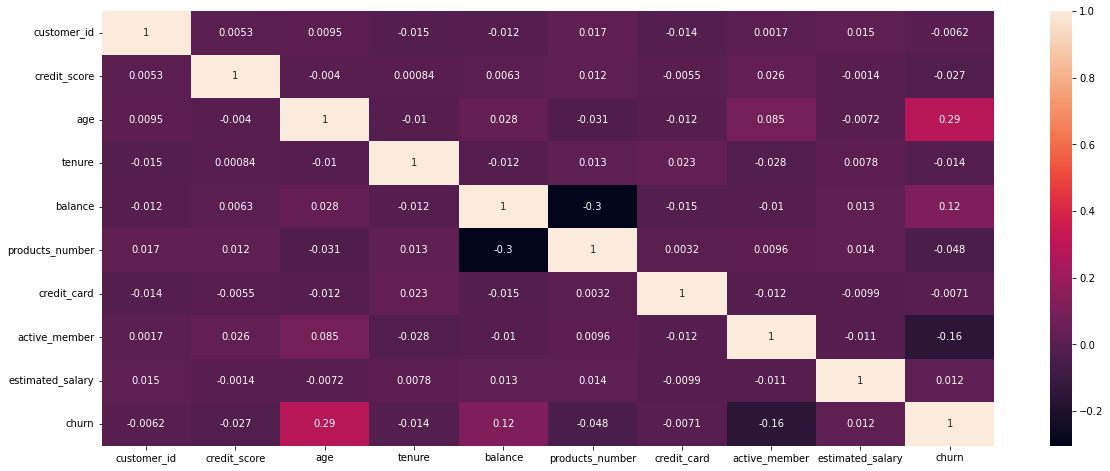

In [19]:
plt.subplots(figsize=(20,8))
sns.heatmap(correlation,annot=True,
           xticklabels = correlation.columns.values,
           yticklabels = correlation.columns.values);
plt.show()

To calculate the correlation between the numeric variables we can use heatmap to find correlation among them

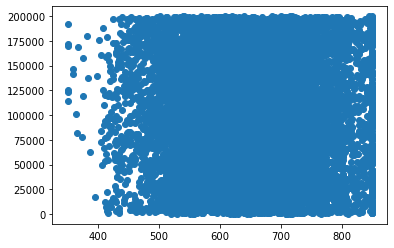

In [20]:
plt.scatter(df.credit_score,df.estimated_salary)
plt.show()

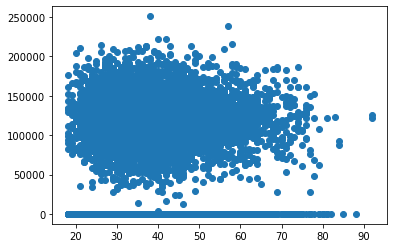

In [35]:
plt.scatter(df.age,df.balance)
plt.show()

In [21]:
df.skew()

C:\Users\user\AppData\Local\Temp/ipykernel_14472/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


customer_id         0.001149
credit_score       -0.071607
age                 1.011320
tenure              0.010991
balance            -0.141109
products_number     0.745568
credit_card        -0.901812
active_member      -0.060437
estimated_salary    0.002085
churn               1.471611
dtype: float64

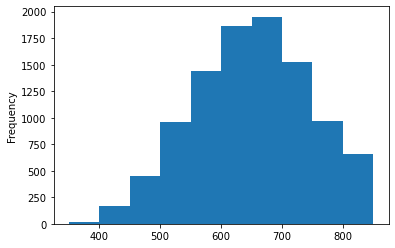

In [22]:
df.credit_score.plot.hist()
plt.show()

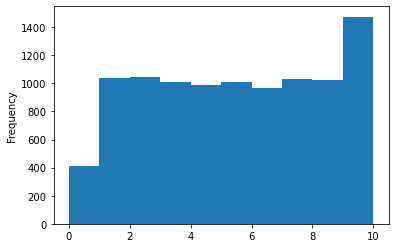

In [23]:
df.tenure.plot.hist()
plt.show()

In [24]:
df.balance.describe()

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: balance, dtype: float64

In [25]:
df.credit_score.describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: credit_score, dtype: float64

In [26]:
df.country.value_counts(normalize=True)

France     0.5014
Germany    0.2509
Spain      0.2477
Name: country, dtype: float64

In [27]:
df.gender.value_counts(normalize=True)

Male      0.5457
Female    0.4543
Name: gender, dtype: float64

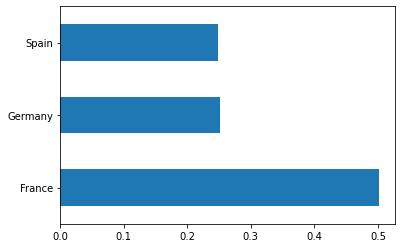

In [28]:
df.country.value_counts(normalize=True).plot.barh()
plt.show()

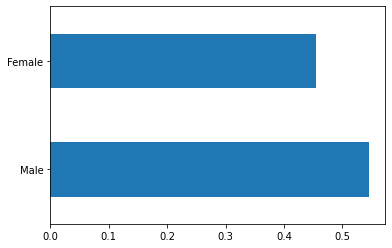

In [29]:
df.gender.value_counts(normalize=True).plot.barh()
plt.show()

In [30]:
df.age.value_counts(normalize=True)

37    0.0478
38    0.0477
35    0.0474
36    0.0456
34    0.0447
       ...  
92    0.0002
82    0.0001
88    0.0001
85    0.0001
83    0.0001
Name: age, Length: 70, dtype: float64

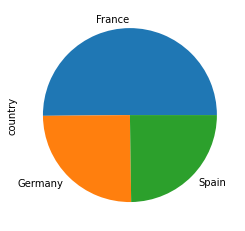

In [31]:
df.country.value_counts(normalize=True).plot.pie()
plt.show()

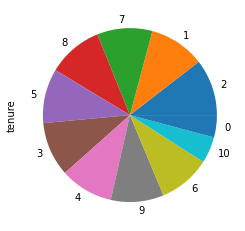

In [32]:
df.tenure.value_counts(normalize=True).plot.pie()
plt.show()

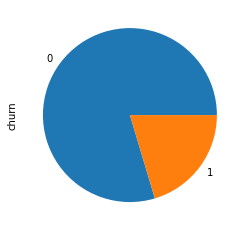

In [33]:
df.churn.value_counts(normalize=True).plot.pie()
plt.show()

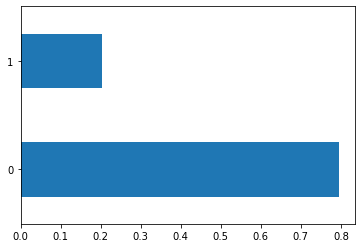

In [32]:
df.churn.value_counts(normalize=True).plot.barh()
plt.show()

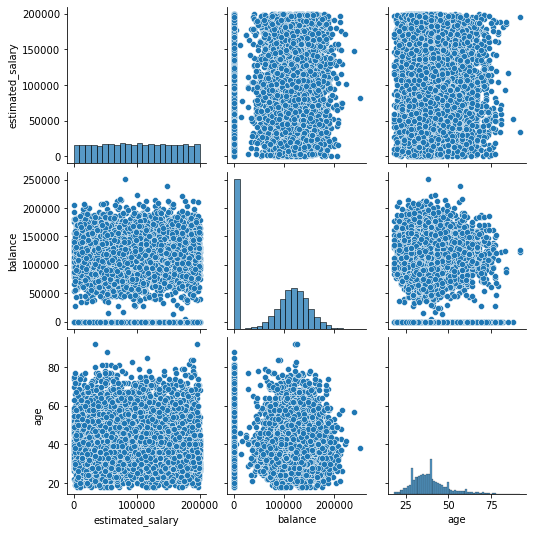

In [33]:
sns.pairplot(data=df,vars=["estimated_salary","balance","age"])
plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


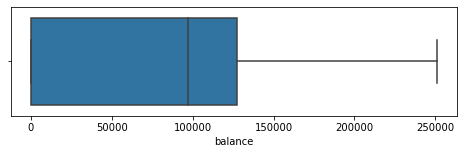

In [34]:
plt.figure(figsize=[8,2])
sns.boxplot(df.balance)
plt.show()

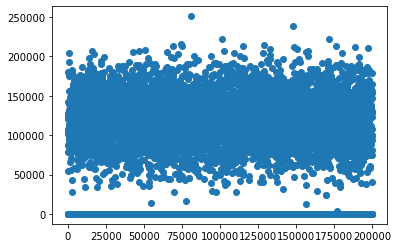

In [35]:
plt.scatter(df.estimated_salary, df.balance)
plt.show()

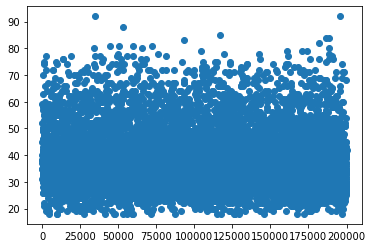

In [36]:
plt.scatter(df.estimated_salary, df.age)
plt.show()

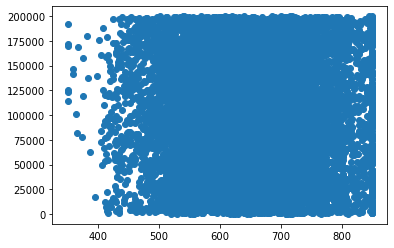

In [37]:
plt.scatter(df.credit_score,df.estimated_salary)
plt.show()

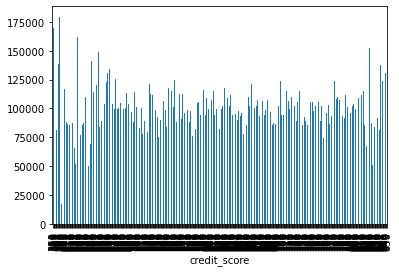

In [38]:
df.groupby(["credit_score"])["estimated_salary"].mean().plot.bar()
plt.show()

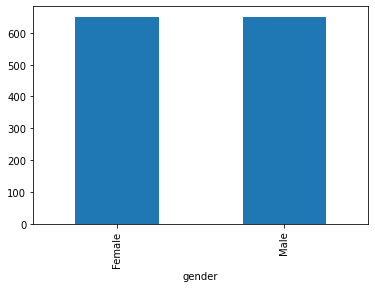

In [39]:
df.groupby(["gender"])["credit_score"].mean().plot.bar()
plt.show()

<AxesSubplot:xlabel='country'>

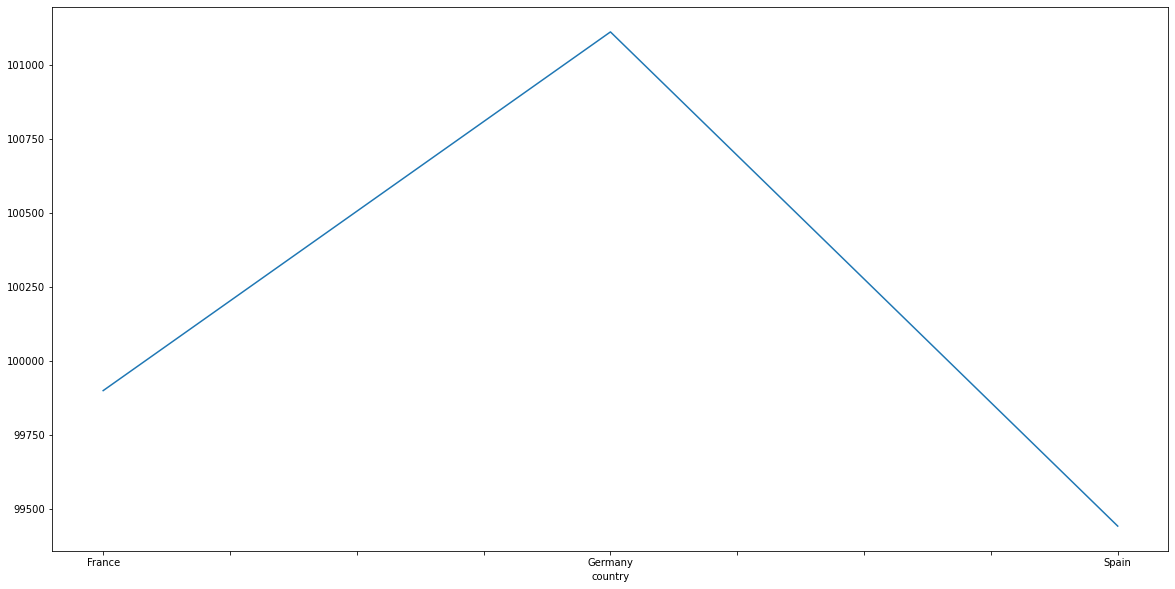

In [40]:
df.groupby('country').mean()['estimated_salary'].plot(kind='line',figsize=(20,10))

In [41]:
graphs=pd.pivot_table(data=df,index="country",columns="gender",values="active_member")
graphs

gender,Female,Male
country,,
France,0.513932,0.519070
Germany,0.468567,0.523556
Spain,0.516988,0.539625


<AxesSubplot:xlabel='gender', ylabel='country'>

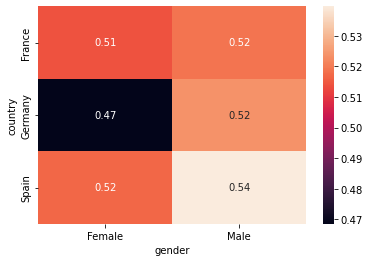

In [42]:
sns.heatmap(graphs,annot=True)